# Class 4: Unsupervised Learning

### Agenda
1. Supervised vs Unsupervised Learning
2. Clustering
    - k-means
    - Hierarchical clustering
    - Metrics for clustering quality
3. Dimensionality Reduction
    - PCA

## 0. Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(0)

## 1. Supervised vs Unsupervised Learning

### Supervised Learning

In supervised learning, the model is trained on a labeled dataset, which means that each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs that can be used to predict the labels of new, unseen data. 

**Key Characteristics:**
- **Labeled Data:** Training data includes input-output pairs.
- **Goal:** Predict the output (label) for new inputs.
- **Types of Problems:** Classification (e.g., disease prediction) and regression (e.g., medical costs).

**Example in Healthcare:**

Predicting whether a patient has a heart disease based on features like blood pressure and cholesterol levels. The training data would include many patients' records with known outcomes (i.e., whether they have heart disease or not).

Synthetic dataset

In [2]:
# Features: cholesterol levels and age
num_samples = 200

cholesterol = np.concatenate([np.random.normal(180, 20, num_samples // 2),
                              np.random.normal(220, 20, num_samples // 2)])
age = np.concatenate([np.random.normal(50, 5, num_samples // 2),
                      np.random.normal(60, 5, num_samples // 2)])

# Target variable: heart disease (binary)
heart_disease = np.concatenate([np.zeros(num_samples // 2), np.ones(num_samples // 2)])

Plot the data points

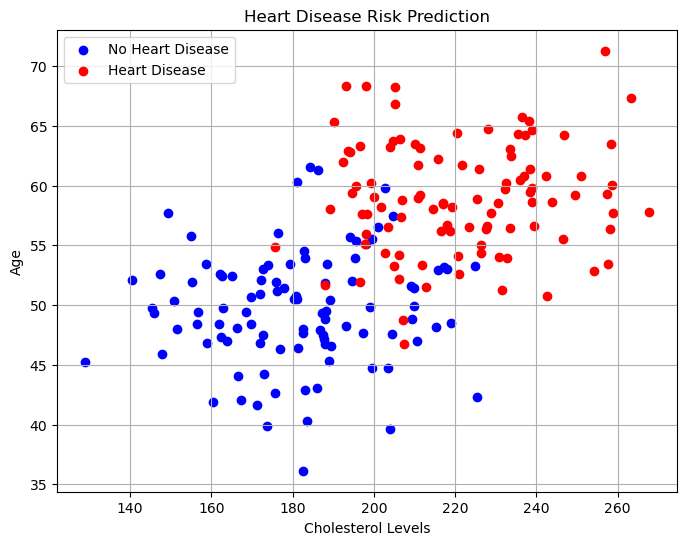

In [3]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing target variable (heart disease)
plt.scatter(cholesterol[heart_disease == 0], age[heart_disease == 0], color='blue', label='No Heart Disease')
plt.scatter(cholesterol[heart_disease == 1], age[heart_disease == 1], color='red', label='Heart Disease')

plt.xlabel('Cholesterol Levels')
plt.ylabel('Age')
plt.title('Heart Disease Risk Prediction')
plt.legend()
plt.grid(True)
plt.show()

Plot the datapoints with a decision boundary

In [4]:
# Fit logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(np.vstack((cholesterol, age)).T, heart_disease)

LogisticRegression(solver='liblinear')

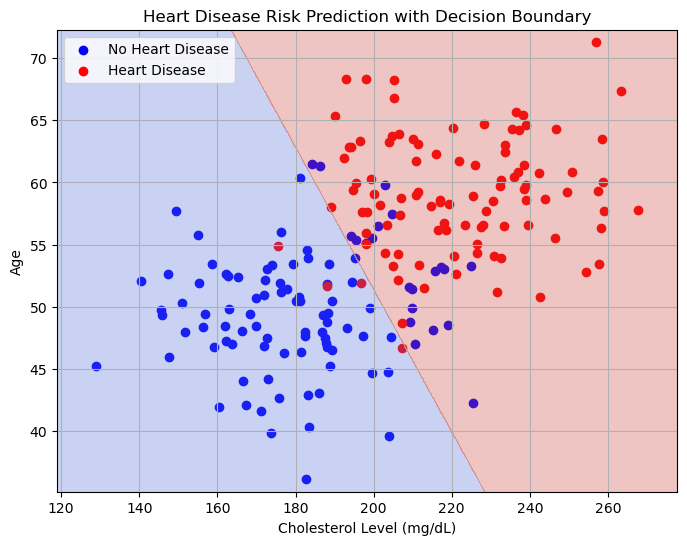

In [5]:
# Plotting decision boundary
plt.figure(figsize=(8, 6))

# Plot data points with colors representing target variable (heart disease)
plt.scatter(cholesterol[heart_disease == 0], age[heart_disease == 0], color='blue', label='No Heart Disease')
plt.scatter(cholesterol[heart_disease == 1], age[heart_disease == 1], color='red', label='Heart Disease')

# Create meshgrid for decision boundary
x_min, x_max = cholesterol.min() - 10, cholesterol.max() + 10
y_min, y_max = age.min() - 1, age.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predictions on meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and color regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Age')
plt.title('Heart Disease Risk Prediction with Decision Boundary')
plt.legend()
plt.grid(True)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

### Unsupervised Learning

In unsupervised learning, the model is trained on a dataset without labeled responses. The goal is to infer the natural structure present within a set of data points. 

**Key Characteristics:**
- **Unlabeled Data:** Training data does not include output labels.
- **Goal:** Discover patterns or structures in the data.
- **Types of Problems:** Clustering (e.g., grouping patients by their diagnostics) and dimensionality reduction (e.g., reducing the number of features).

**Example in Healthcare:**

Grouping patients into clusters based on similarities in their medical records (e.g., blood pressure and cholesterol levels) without prior knowledge of the patient's health conditions. This can help identify patterns that could lead to new medical insights or treatments.

Generate synthetic dataset

In [6]:
# Generate synthetic data with 4 clusters
n_samples = 300
centers = [(110, 160), (130, 200), (150, 220), (170, 250)]
cluster_std = [5, 10, 7, 8]  # Standard deviation for each cluster

In [7]:
# Generate data
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

Plot the data points to explore the distribution 

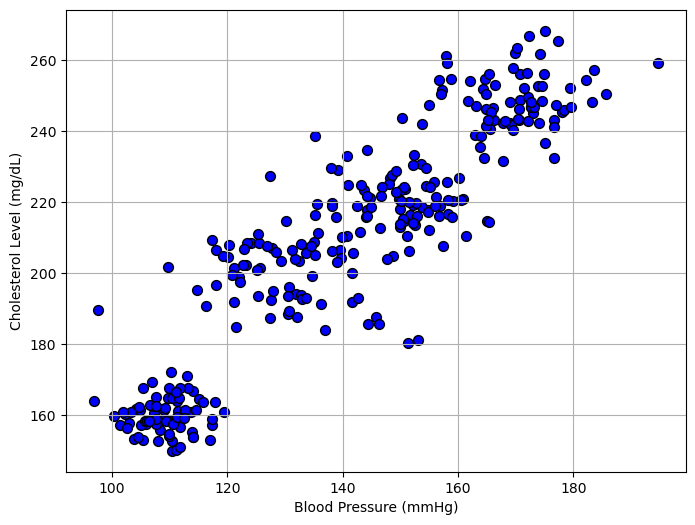

In [8]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.grid(True)
plt.show()

Apply the clustering algorithm k-means with k = 3

In [9]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

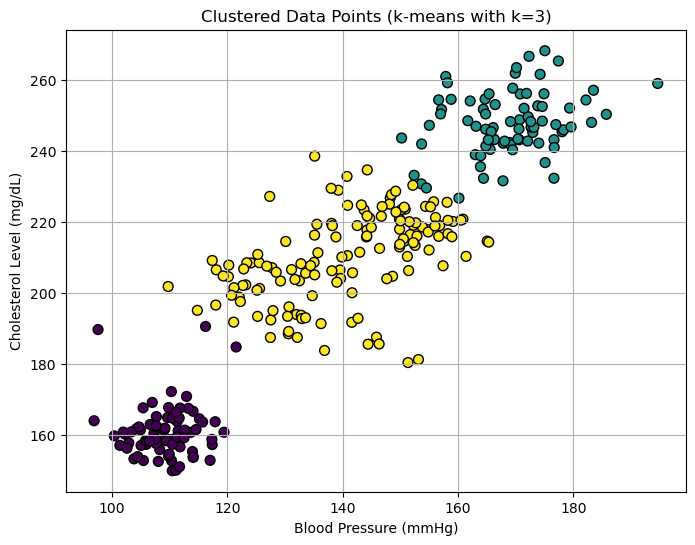

In [10]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.title('Clustered Data Points (k-means with k=3)')
plt.grid(True)
plt.show()

Apply the clustering algorithm k-means with k = 4

In [11]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

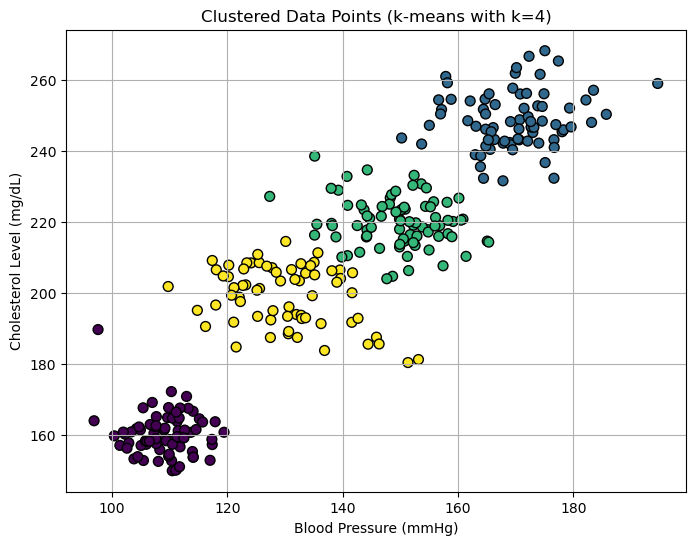

In [12]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points with colors representing clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.title('Clustered Data Points (k-means with k=4)')
plt.grid(True)
plt.show()

## 2. Clustering

### K-means

K-means clustering is a popular unsupervised learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters. 

The goal of K-means is to group similar data points together and discover underlying patterns or clusters in the data.

In K-means clustering, the most commonly used distance metric to measure similarity between data points and centroids is Euclidean distance. The Euclidean distance between two points ${x}_i$ and ${x}_j$ in a $n$-dimensional space is calculated as:

$$d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}$$

where:
- ${x}_{ik}$ is the $k$-th feature of point ${x}_i$,
- ${x}_{jk}$ is the $k$-th feature of point ${x}_j$,
- $n$ is the number of features (dimensionality) of the points.

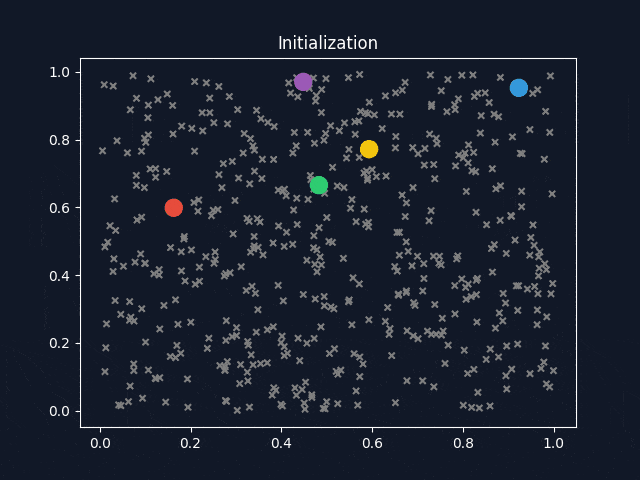

In [13]:
display(Image(filename='data/kmeans_gif.gif'))

#### How to choose the optmial number of clusters?
- Elbow method
- Silhouette Score

**Elbow method:**

1. We define a range of k values to test, from 2 to 6 clusters in this case.
2. For each k value, we run the K-Means algorithm and compute the inertia.
3. We plot the number of clusters (k) on the x-axis and the inertia on the y-axis.
4. We look for the "elbow point".

 Inertia, also known as within-cluster sum of squares (WCSS), measures the sum of squared distances between each data point and the centroid of the cluster to which it belongs. 
 
 The formula for inertia 𝐼 is given by:

 $$I = \sum_{k=1}^{K} \sum_{i \in C_k} | x_i - \mu_k |^2$$

 Where:
- $K$ is the number of clusters.
- $C_k$ is the set of points in cluster $K$.
- $x_i$ is a data point in cluster $K$.
- $\mu_k$ is the centroid of cluster $K$.
- $| x_i - \mu_k |^2$ represents the squared Euclidean distance between a data point $x_i$ and the centroid $\mu_k$.

In [14]:
# Define the range of k values to test
k_values = range(2, 7)
inertia_values = []

In [15]:
# Compute K-Means clustering and calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

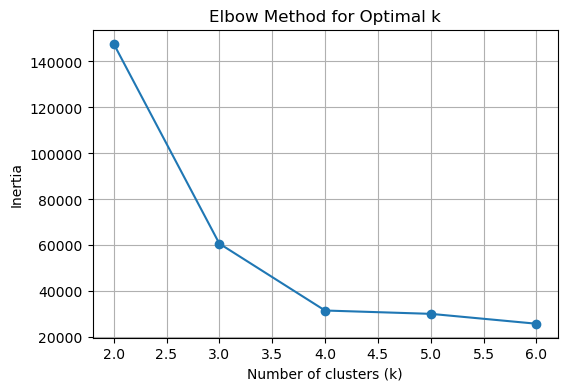

In [16]:
# Plotting the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

**Silhouette Score:**

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It provides a way to assess the quality of clustering.

The silhouette score $S(i)$ for a single data point $i$ is calculated as:

$$S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

Where:
- $a(i)$: Average distance from data point $i$ to other points within the same cluster.
- $b(i)$: Average distance from data point $i$ to points in the nearest neighboring cluster (excluding the cluster to which $i$ belongs).

The silhouette score for the entire dataset is the average of silhouette scores for all data points:

$$S = \frac{1}{N} \sum_{i=1}^{N} S(i)$$

Where $N$ is the total number of data points.

In [17]:
# Define the range of k values to test
k_values = range(2, 7)
silhouette_scores = []
labels_list = []

In [18]:
# Compute K-Means clustering and calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    labels_list.append(labels)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

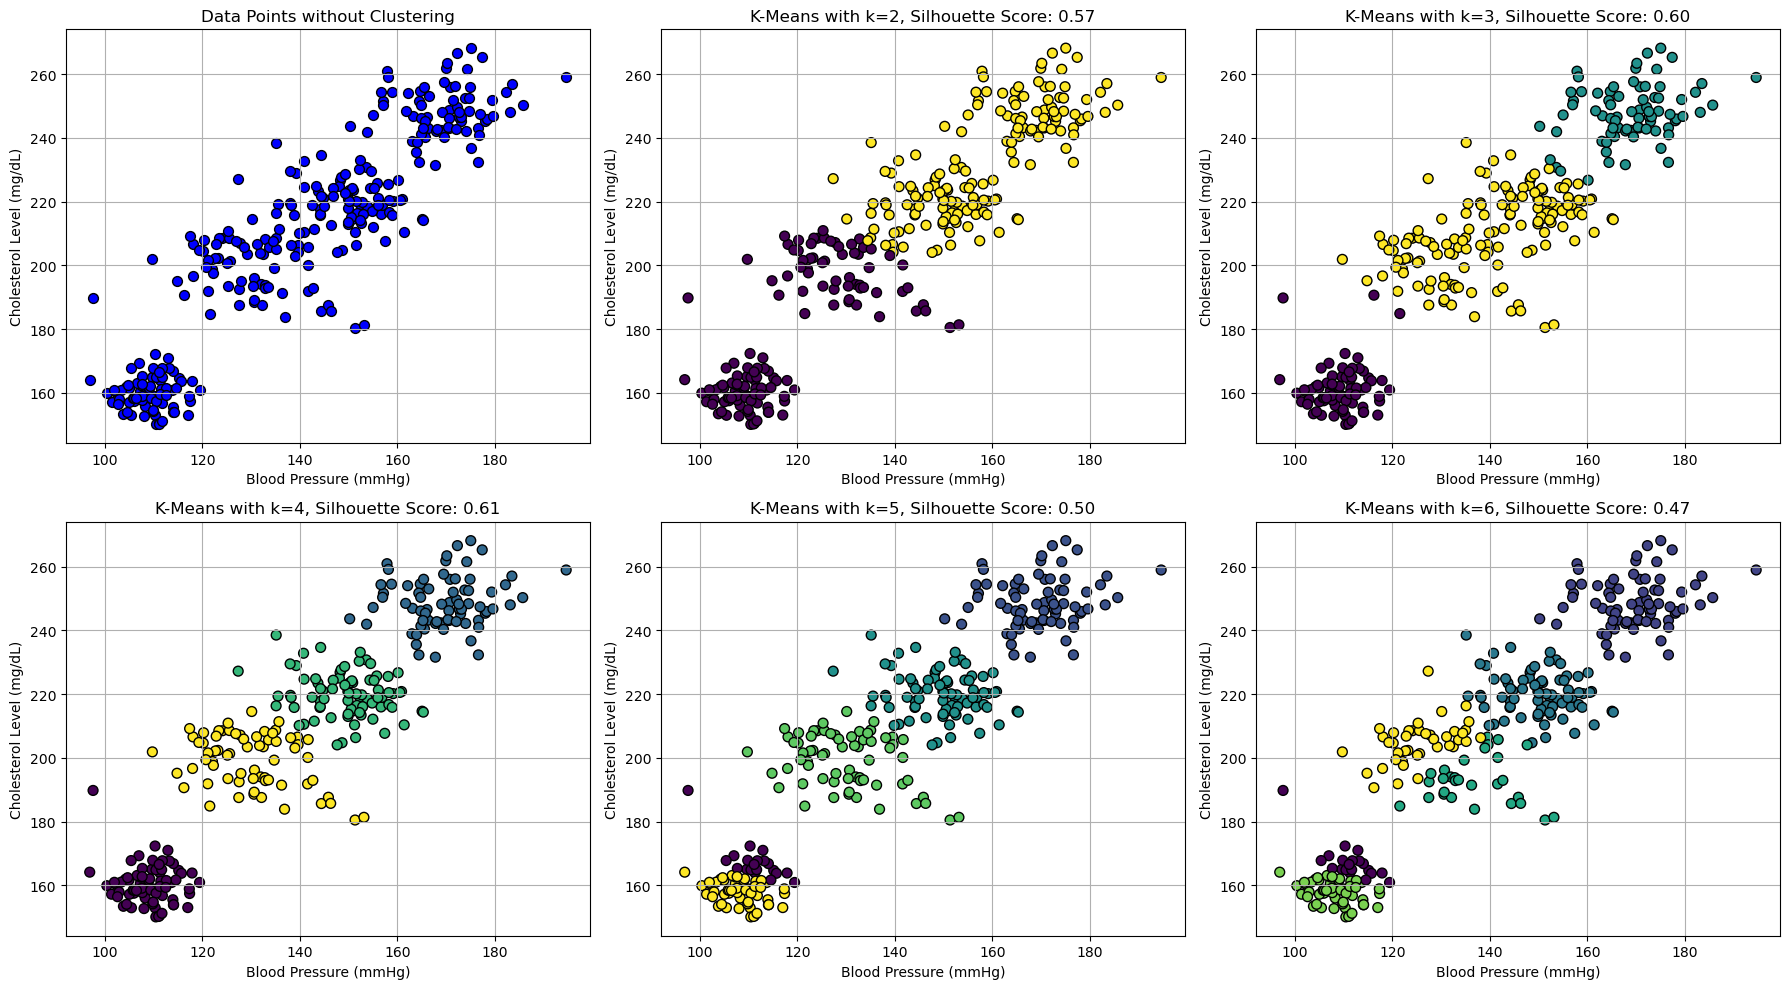

In [19]:
# Plotting the results
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# First plot: Scatter plot of data points without clustering
axs[0, 0].scatter(X[:, 0], X[:, 1], color='blue', edgecolor='k', s=50)
axs[0, 0].set_title('Data Points without Clustering')
axs[0, 0].set_xlabel('Blood Pressure (mmHg)')
axs[0, 0].set_ylabel('Cholesterol Level (mg/dL)')
axs[0, 0].grid(True)

# Subsequent plots: Clustering results with silhouette scores
for i, k in enumerate(k_values):
    row = (i + 1) // 3
    col = (i + 1) % 3
    axs[row, col].scatter(X[:, 0], X[:, 1], c=labels_list[i], cmap='viridis', edgecolor='k', s=50)
    axs[row, col].set_title(f'K-Means with k={k}, Silhouette Score: {silhouette_scores[i]:.2f}')
    axs[row, col].set_xlabel('Blood Pressure (mmHg)')
    axs[row, col].set_ylabel('Cholesterol Level (mg/dL)')
    axs[row, col].grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

In [20]:
# Fit K-Means for k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

In [21]:
# Compute silhouette scores and samples
silhouette_avg = silhouette_score(X, labels)
silhouette_values = silhouette_samples(X, labels)

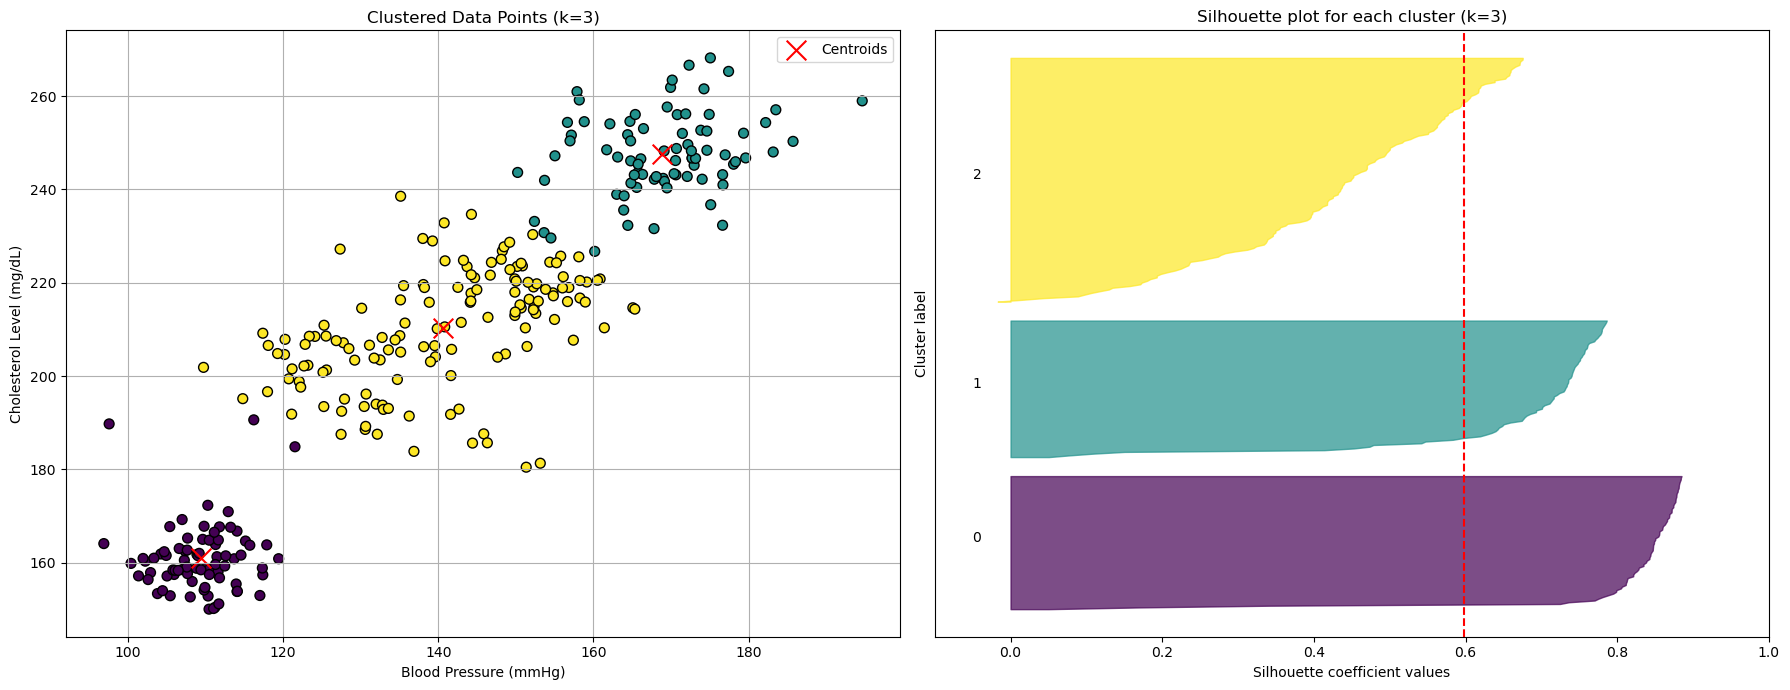

In [22]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot clustered data points
ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
ax1.set_xlabel('Blood Pressure (mmHg)')
ax1.set_ylabel('Cholesterol Level (mg/dL)')
ax1.set_title(f'Clustered Data Points (k={k})')
ax1.legend()
ax1.grid(True)

# Plot silhouette plot for each cluster
y_lower = 10
for i in range(k):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / (k-1))
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax2.set_title(f'Silhouette plot for each cluster (k={k})')
ax2.set_xlabel('Silhouette coefficient values')
ax2.set_ylabel('Cluster label')
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
ax2.set_yticks([])
ax2.set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()

In [23]:
# Fit K-Means for k=3
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

In [24]:
# Compute silhouette scores and samples
silhouette_avg = silhouette_score(X, labels)
silhouette_values = silhouette_samples(X, labels)

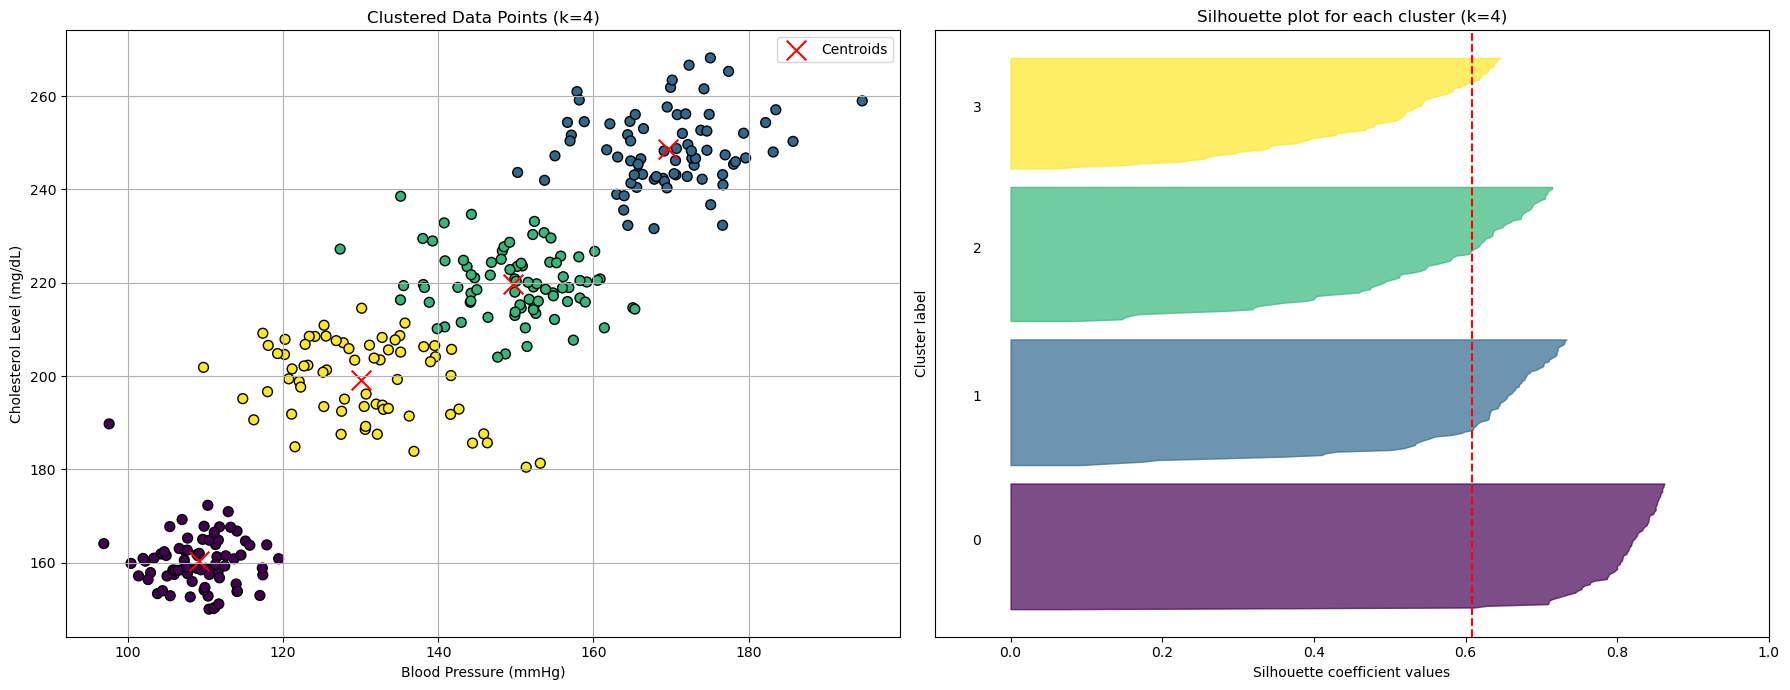

In [25]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot clustered data points
ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
ax1.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
ax1.set_xlabel('Blood Pressure (mmHg)')
ax1.set_ylabel('Cholesterol Level (mg/dL)')
ax1.set_title(f'Clustered Data Points (k={k})')
ax1.legend()
ax1.grid(True)

# Plot silhouette plot for each cluster
y_lower = 10
for i in range(k):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / (k-1))
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax2.set_title(f'Silhouette plot for each cluster (k={k})')
ax2.set_xlabel('Silhouette coefficient values')
ax2.set_ylabel('Cluster label')
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
ax2.set_yticks([])
ax2.set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()

### Hierarchical Clustering

Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters. It seeks to build nested clusters by either recursively merging or splitting clusters based on their distances or similarities. 

There are two main types of hierarchical clustering:

1. Agglomerative Clustering: This is a bottom-up approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. The algorithm proceeds until all observations belong to a single cluster.

2. Divisive Clustering: This is a top-down approach where all observations start in one cluster, and splits are performed recursively until each observation is in its own cluster.

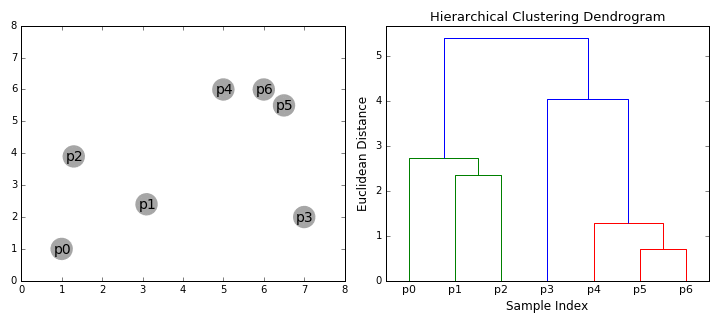

In [26]:
display(Image(filename='data/hierarch_gif.gif'))

The Ward linkage method is a criterion used to decide how to merge clusters together. It minimizes the variance (or sum of squared differences) within all clusters being merged.

It tends to merge clusters that lead to the smallest increase in total within-cluster variance after merging.

In [27]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

In [28]:
# Cut the dendrogram to obtain clusters
threshold = 300  # Adjust the threshold as needed
labels = fcluster(linked, threshold, criterion='distance')

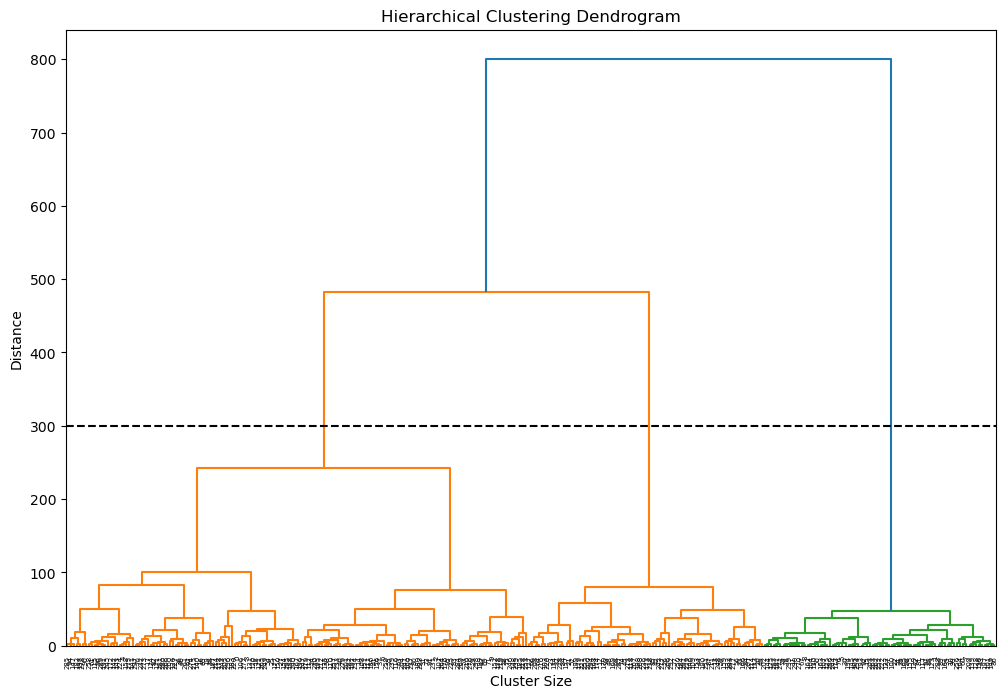

In [29]:
# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)

# Add a horizontal line at distance 100
plt.axhline(y=threshold, color='k', linestyle='--', linewidth=1.5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

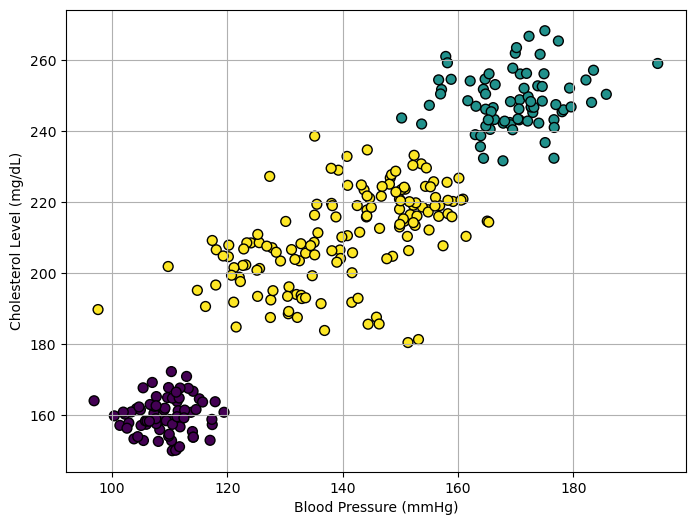

In [30]:
# Plotting the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.grid(True)
plt.show()

## Use-case: Clustering Heart Disease Patient Data
We are going to look at anonymized patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors would benefit from learning about the outcomes of patients similar to those they are treating. The data we are analyzing comes from the V.A. Medical Center in Long Beach, CA.

This example is adapted from: https://www.kaggle.com/code/darkaster/clustering-heart-disease-patient-data#1.-Targeting-treatment-for-heart-disease-patients

**Note:** You saw this dataset on the previous class!

In [31]:
# Loading the data
data = pd.read_csv("data/heart_disease.csv")

In [32]:
# how the dataframe looks like
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosed
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [33]:
# check shape of the dataframe
data.shape

(303, 14)

In [34]:
# check missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
Diagnosed    0
dtype: int64

In [35]:
# we can remove the rows with missing values (for simplicity)
data = data.dropna()
data.shape

(297, 14)

Here's what we know about this dataset:

- contains 303 rows (observations)
- 14 columns

And some documentation we found about each column:

1. **Age:** age in years
2. **Sex:** sex (1 = male; 0 = female)
3. **Cp:** chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
4. **Trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5. **Chol:** serum cholesterol in mg/dl
6. **Fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **Restecg:** resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **Thalach:** maximum heart rate achieved
9. **Exang:** exercise induced angina (1 = yes; 0 = no)
10. **Oldpeak:** ST depression induced by exercise relative to rest
11. **Slope:** the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **Ca:** number of major vessels (0-3) colored by flourosopy
13. **Thal:** 
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversible defect
14. **Diagnosed:** diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing


We'll start by applying the elbow method

In [36]:
# Define the range of k values to test -- given that we have many more variables we will compute the elbow method until k=10
k_values = range(2, 11)
inertia_values = []

In [37]:
# Compute K-Means clustering and calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

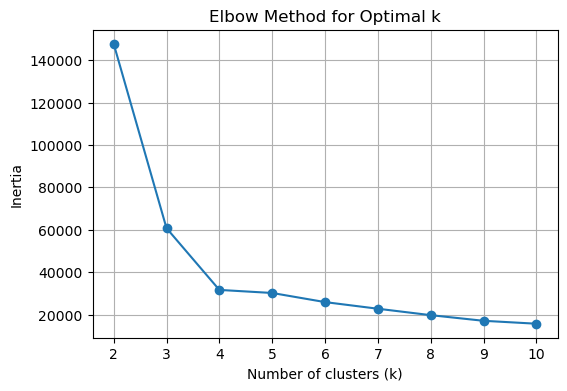

In [38]:
# Plotting the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

We do the similar analysis for the silhouette score

In [39]:
# Define the range of k values to test
k_values = range(2, 11)
silhouette_scores = []
labels_list = []

In [40]:
# Compute K-Means clustering and calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    labels_list.append(labels)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

In [41]:
# Create a pandas DataFrame
silhouette_df = pd.DataFrame({
    'Number of Clusters': k_values,
    'Silhouette Score': silhouette_scores
})

In [42]:
silhouette_df

,Number of Clusters,Silhouette Score
0,2,0.573615
1,3,0.597640
2,4,0.608379
3,5,0.497177
4,6,0.470466
5,7,0.418704
6,8,0.357273
7,9,0.348790
8,10,0.349263


**But, can we somehow visualize the clusters?**

Okay, it's not a 2D problem, however, there are some ways that we can use to visualize the clusters. When we deal with high-dimensional data, visualizing the clusters becomes challenging because we cannot easily plot data in more than 2 or 3 dimensions. This makes it difficult to interpret the results of clustering algorithms.

To address this issue, we can use dimensionality reduction techniques to project high-dimensional data into lower dimensions while preserving the important structure and relationships in the data.


## 3. Dimensionality Reduction

Dimensionality reduction techniques help us reduce the number of variables under consideration, and can be broadly categorized into feature selection and feature extraction methods. 

Feature extraction methods transform the data into a lower-dimensional space. One of the most widely used techniques for feature extraction is Principal Component Analysis (PCA).

### PCA
Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction. It transforms the original high-dimensional data into a new set of uncorrelated variables called principal components. These principal components are ordered such that the first few retain most of the variation present in the original dataset.


<img src="data/pca.png" alt="PCA Explanation" width="800"/>


#### How does PCA work?

PCA works by finding the directions (principal components) along which the variance of the data is maximized. Here’s a step-by-step summary of how PCA is performed:

1. **Standardization**: The data is standardized (mean = 0 and variance = 1) because PCA is affected by the scales of the features.
2. **Covariance Matrix Computation**: The covariance matrix of the standardized data is computed to understand the relationships between the features.
3. **Eigenvalues and Eigenvectors**: The eigenvalues and eigenvectors of the covariance matrix are calculated. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the magnitude of the variance in these directions.
4. **Principal Components Selection**: The eigenvectors are sorted by their corresponding eigenvalues in descending order. The top k eigenvectors form the new feature space.
5. **Projection onto Principal Components**: The original data is projected onto the selected principal components to obtain a reduced representation of the data.

In [43]:
# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels_k4 = kmeans.fit_predict(data_standardized)

In [45]:
# Apply PCA
pca = PCA(n_components=2)  # Change n_components to the desired number of components
data_pca = pca.fit_transform(data_standardized)

In [46]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster Labels'] = cluster_labels_k4

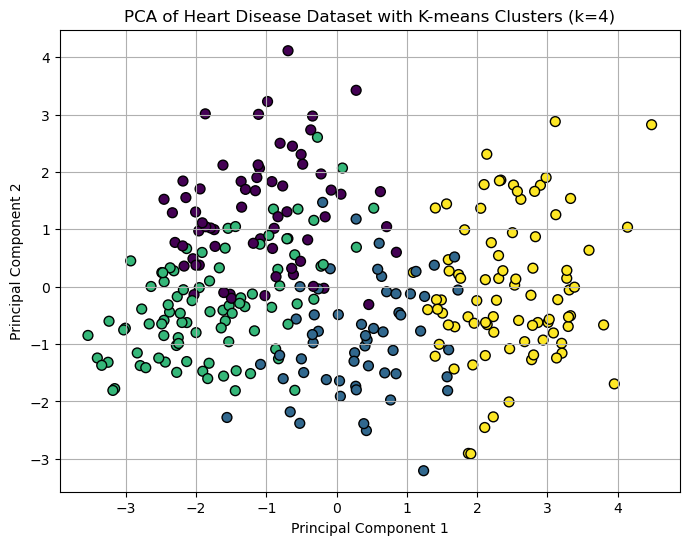

In [47]:
# Visualize the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster Labels'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Disease Dataset with K-means Clusters (k=4)')
plt.grid(True)
plt.show()

In [48]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.25894809, 0.11612551])

In [49]:
# Cumulative variance explained
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Variance Explained by Principal Components:", cumulative_variance[1])

Cumulative Variance Explained by Principal Components: 0.37507359821317043


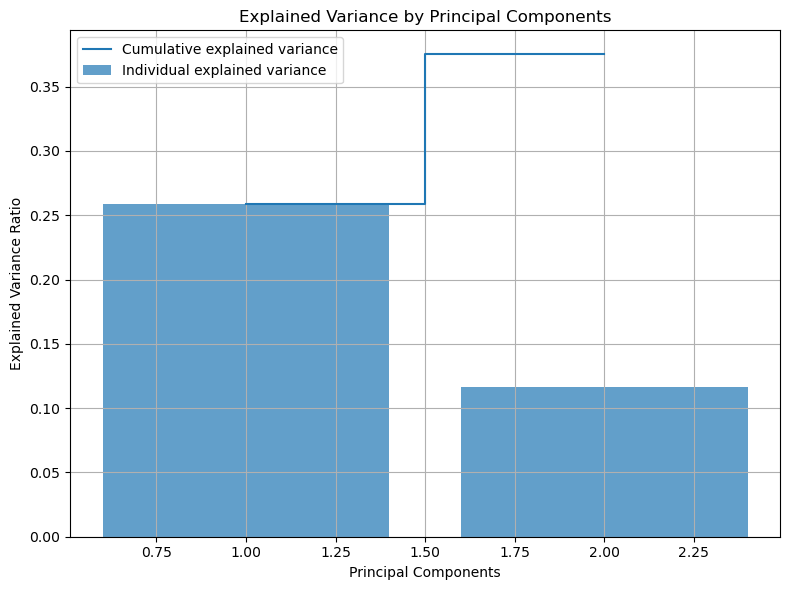

In [50]:
# Plotting the variance explained
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

Can we represent the dataset in 3 dimensions?

In [51]:
# Apply PCA
pca = PCA(n_components=3)  # Change n_components to the desired number of components
data_pca = pca.fit_transform(data_standardized)

In [52]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster Labels'] = cluster_labels_k4

In [53]:
from mpl_toolkits.mplot3d import Axes3D

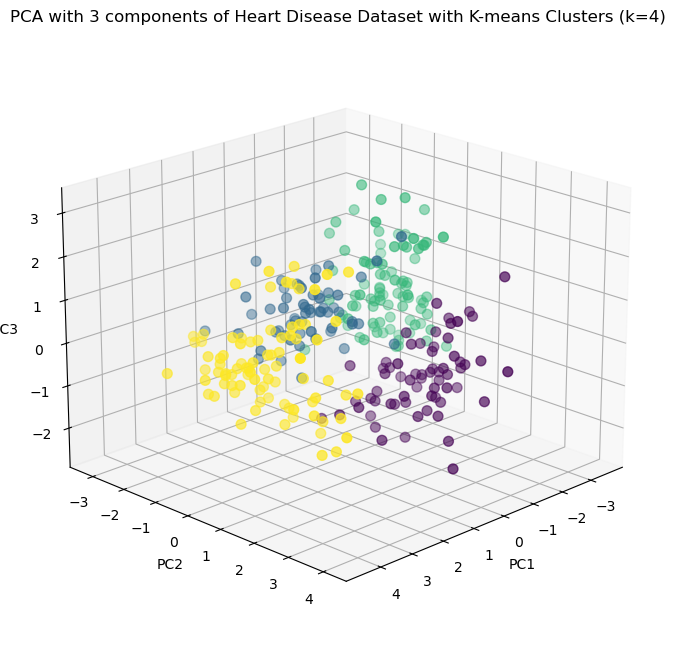

In [54]:
# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster Labels'], cmap='viridis', s=50)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA with 3 components of Heart Disease Dataset with K-means Clusters (k=4)')

# Change view perspective (elevation, azimuth)
ax.view_init(elev=20, azim=45)

# Show plot
plt.show()